##### Project 1: To Plot Execution time of various sorting algorithms for various inputs.  
1. Selection Sort
2. Insertion Sort
3. Merge Sort 
4. Bubble Sort
5. Quick Sort

In [13]:
import timeit 
import random
import pprint
import time
import matplotlib.pyplot as plt

In [14]:
min = int(-100000)
max = int(100000)
data_random = []
data_accending = []
data_decending = []

In [15]:
data_random.clear()
for x in range(10): 
    data_random.append(int(random.randint(min,max)))
data_accending = sorted(data_random)
data_decending = sorted(data_random,reverse = True)

In [16]:
def selection_sort(data):
    length = len(data)
    for i in range (0,len(data)):
        max_index = 0
        for j in range(i,(length - i - 1)):
            if data[j] > data[max_index]:
                max_index = j
                
        data[-i-1],data[max_index] = data[max_index],data[-i-1]
    return data

In [17]:
print (selection_sort(data_random))

[-70031, 16612, -32240, -46766, -51405, -10516, 13867, 44563, 53154, 56109]


In [18]:
def bubble_sort(data):
    length = len(data)
    for i in range (0,length):
        for j in range(0,(length - i - 1)):
            if data[j] > data[j+1]:
                data[j],data[j+1] = data[j+1],data[j]
    return (data)

In [19]:
print(bubble_sort(data_random))

[-70031, -51405, -46766, -32240, -10516, 13867, 16612, 44563, 53154, 56109]


"""
def insertion_sort(data):
    length = len(data)
    for i in range(1,length):
        index = i+1
        for j in range (0,i):
"""            

In [20]:
def modified_bubble_sort(data):
    length = len(data)
    is_sorted = False
    for i in range (0,length):
        if is_sorted:
            break
        is_sorted = True
        for j in range(0,(length - i - 1)):
            if data[j] > data[j+1]:
                is_sorted = False
                data[j],data[j+1] = data[j+1],data[j]
    return (data)

In [21]:
print(modified_bubble_sort(data_random))

[-70031, -51405, -46766, -32240, -10516, 13867, 16612, 44563, 53154, 56109]


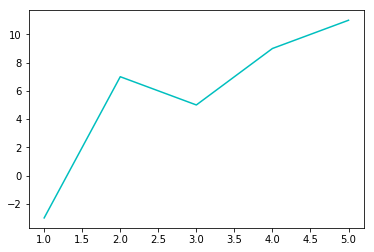

In [22]:
x = [1,2,3,4,5] 
y = [-3,7,5,9,11]
plt.plot(x,y,color="c")
plt.show()

In [23]:
def time_sorting_algo():
    """
        This functions measures the runtimes of various sorting algorithms
        using the time.time() function and returns them in a dictionary
        The algorithms under consideration are mentioned above 
    """
    start = timecode()
    